In [1]:
import pandas as pd
import numpy as np
import requests  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file ="/Users/liushengchen/course/Scala/rawDataPython-master/201939.csv" # use your path
df_1 = pd.read_csv(file)
df_1.head()
ID_count =df_1.groupby("game_id").size()
#df_1['seconds_remainingheaders = ["index", "grid_type", "x_loc", "y_loc", "radius", "moment", "period", "unix_time", "game_clock", "shot_clock"]
 #   player_moments_df = pd.DataFrame(player_moments, columns=headers)

In [4]:
# list GAME_ID
unique_id = df_1.game_id.unique()


[21500003]

In [5]:
new_url=[]
url_table=[]
for id in unique_id:
    new_url = 'http://stats.nba.com/stats/playbyplay?GameID='+str(id)+'&StartPeriod=0&EndPeriod=0'
    url_table.append(new_url)


In [6]:
df_1["seconds_remaining"] = df_1.seconds_remaining.map("{:02}".format)
df_1["TIME"] = '00' + df_1["game_id"].map(str) + ':'+ \
df_1["period"].map(str) + ':'+ \
df_1["minutes_remaining"].map(str) + ':'+ \
df_1['seconds_remaining'].map(str)

In [7]:
len(df_1)

1598

In [8]:
df_1.head(5)

,Unnamed: 0,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,...,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm,shot_made_numeric,shot_value,TIME
0,1,Shot Chart Detail,21500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,1.2,8.35,1,made,20151027,GSW,NOP,1,2,0021500003:1:10:56
1,2,Shot Chart Detail,21500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,-17.6,24.75,1,missed,20151027,GSW,NOP,0,3,0021500003:1:10:29
2,3,Shot Chart Detail,21500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,2.0,6.15,1,missed,20151027,GSW,NOP,0,2,0021500003:1:9:34
3,4,Shot Chart Detail,21500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,-19.7,24.55,1,made,20151027,GSW,NOP,1,3,0021500003:1:9:13
4,5,Shot Chart Detail,21500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,...,-0.4,6.05,1,made,20151027,GSW,NOP,1,2,0021500003:1:7:11


# league average

In [14]:
LeagueAverages.keys()

dict_keys(['headers', 'name', 'rowSet'])

In [15]:
LeagueAverages_headers = LeagueAverages['headers']
LeagueAverages_rowSet = LeagueAverages['rowSet']

In [16]:
df_average_regular = pd.DataFrame(LeagueAverages_rowSet, columns=LeagueAverages_headers)
df_average_regular['SEASON_TYPE']='Regular'

In [17]:
df_average_regular.tail(5)

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,SEASON_TYPE
15,League Averages,Mid-Range,Right Side Center(RC),16-24 ft.,8145,3249,0.399,Regular
16,League Averages,Mid-Range,Right Side(R),16-24 ft.,4924,1996,0.405,Regular
17,League Averages,Mid-Range,Right Side(R),8-16 ft.,7630,3011,0.395,Regular
18,League Averages,Restricted Area,Center(C),Less Than 8 ft.,67444,40634,0.602,Regular
19,League Averages,Right Corner 3,Right Side(R),24+ ft.,7361,2803,0.381,Regular


# Score margin

In [13]:
df_final=[]
appended_data=[]
for index, id in enumerate(unique_id):
    file_name = '/Users/liushengchen/course/Scala/rawDataPython-master/playbyplay/'+'play_' + '00'+ str(id) +'.json'
    with open(file_name ) as json_data:
        data = json.load(json_data)
    
    #Create df from data 
    headers = data['resultSets'][0]['headers']
    play_data = data['resultSets'][0]['rowSet']
    df = pd.DataFrame(play_data,columns=headers) 
    
    # Add a new column:Time
    df["TIME"] = df["GAME_ID"].map(str) + ':'+ \
    df["PERIOD"].map(str) + ':'+ \
    df['PCTIMESTRING'].map(str)
    
    # fill in score margin
    if df.loc[0,'SCOREMARGIN']is None:
        df.loc[0,'SCOREMARGIN'] = '0'
    for i,row in df.iterrows():
        if df.loc[i,'SCOREMARGIN'] is None: # None
            df.loc[i,'SCOREMARGIN'] = df.loc[i-1,'SCOREMARGIN']
    # match with shot data
    df_matchtime = df[df['TIME'].isin(df_1['TIME'])]
    
    # find rows involving Curry 
    if df_1.loc[df_1["game_id"]==id].head(1)["htm"].values[0] =="GSW":
        df_curryonly = df_matchtime[df_matchtime["HOMEDESCRIPTION"].str.contains("Curry", na=False)]
    else:
        df_curryonly = df_matchtime[df_matchtime["VISITORDESCRIPTION"].str.contains("Curry", na=False)]
    df_curryonly = df_curryonly [~df_curryonly["EVENTMSGACTIONTYPE"].isin((10,11,12))] #exclude free throws
    df_final = df_curryonly[df_curryonly["HOMEDESCRIPTION"].str.contains("MISS | PTS", na=False)| \
                            df_curryonly["VISITORDESCRIPTION"].str.contains("MISS | PTS",na=False) ]
    df_final = df_final.reset_index(drop=True)
    appended_data.append(df_final)
print("finished")

finished


Fill in score margin

In [14]:
df_ScoreMargin  = pd.concat(appended_data, axis=0)
len(df_ScoreMargin)

1598

In [15]:
ID_count_margin =df_ScoreMargin.groupby("GAME_ID").size()

In [16]:
difference_locations = np.where(ID_count_margin != ID_count)
changed_from = ID_count.values[difference_locations]
changed_to = ID_count_margin.values[difference_locations]

In [17]:
pd.DataFrame({'from': changed_from, 'to': changed_to})

,from,to


# Merge dataframes

In [18]:
df_merged = pd.merge(df_1, df_ScoreMargin[["TIME","SCOREMARGIN"]], how='left', on=['TIME'])

In [19]:
df_merged.to_csv("/Users/liushengchen/course/Scala/rawDataPython-master/201939_score.csv",sep=",")

In [20]:
df_merged

,Unnamed: 0,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,...,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm,shot_made_numeric,shot_value,TIME,SCOREMARGIN
0,1,Shot Chart Detail,21500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,8.35,1,made,20151027,GSW,NOP,1,2,0021500003:1:10:56,3
1,2,Shot Chart Detail,21500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,24.75,1,missed,20151027,GSW,NOP,0,3,0021500003:1:10:29,3
2,3,Shot Chart Detail,21500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,6.15,1,missed,20151027,GSW,NOP,0,2,0021500003:1:9:34,-2
3,4,Shot Chart Detail,21500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,24.55,1,made,20151027,GSW,NOP,1,3,0021500003:1:9:13,3
4,5,Shot Chart Detail,21500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,...,6.05,1,made,20151027,GSW,NOP,1,2,0021500003:1:7:11,3
5,6,Shot Chart Detail,21500003,38,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,...,31.15,1,made,20151027,GSW,NOP,1,3,0021500003:1:6:45,4
6,7,Shot Chart Detail,21500003,46,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,...,24.05,1,made,20151027,GSW,NOP,1,2,0021500003:1:5:50,6
7,8,Shot Chart Detail,21500003,55,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,...,28.05,1,made,20151027,GSW,NOP,1,3,0021500003:1:5:03,7
8,9,Shot Chart Detail,21500003,68,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,...,29.15,1,made,20151027,GSW,NOP,1,3,0021500003:1:3:57,12
9,10,Shot Chart Detail,21500003,82,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,...,28.45,1,missed,20151027,GSW,NOP,0,3,0021500003:1:3:06,9


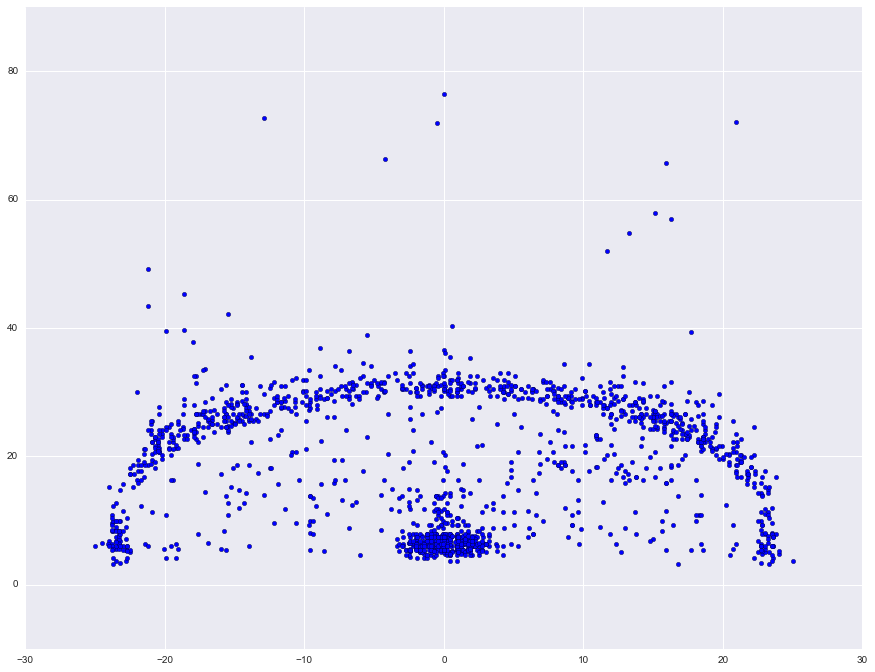

In [22]:
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(df_merged.loc_x, df_merged.loc_y)
# Darker colors represent moments earlier on in the game


# This plots the court
# zorder=0 sets the court lines underneath Harden's movements
# extent sets the x and y axis values to plot the image within.
# The original animation plots in the SVG coordinate space
# which has x=0, and y=0 at the top left.
# So, we set the axis values the same way in this plot.
# In the list we pass to extent 0,94 representing the x-axis 
# values and 50,0 representing the y-axis values



plt.show()